> 개요
김범성님은 게임 회사의 데이터 팀에 합류했습니다.

'다음 분기에 어떤 게임을 설계해야 할까' 라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

아래의 링크를 통해 파일을 다운로드 받으세요.

https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

> 영상 길이 조건을 만족했는가?
 영상이 5분 ~ 10분 사이로 제작됨

> 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답했는가?

 지역은 어떻게 구분했는지 설명함
 
 지역별로 선호하는 게임의 장르를 파악함
 
 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했는지를 설명함

> 연도별 게임의 트렌드가 있을까 라는 질문에 대답했는가?
 
 트렌드는 어떤 것을 기준으로 파악했는지 설명함
 
 연도별로 트렌드가 존재하는지 여부를 언급함
 
 왜 존재한다/존재하지 않는다고 생각했는지 설명함

> 인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되었는가?
 
 인기가 많다는 것을 어떻게 정의했는지 설명함
 
 해당 게임이 왜 인기가 많다고 생각했는지 설명함
 
 시각화를 통해 무엇을 나타내고자 하는지를 고려하여 파라미터를 조정함 (제목, 축이름 필수, 그 외 파라미터는 선택사항)
 
 해당 분석을 통해 어떤 인사이트를 도출할 수 있는지 설명함

> 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론이 제시되었는가?
 분석에 대한 결론이 영상에서 제시됨

> 더불어 유의미한 인사이트를 도출하기 위해서는

 다음 분기가 언제인지
회사의 규모는 어느정도인지
와 같은 디테일한 상황 설정과 더불어 '왜' 이러한 결론을 도출하였는지에 대한 고민이 필요합니다.

### 
🕹️ Data Description

Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 배급한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

### Goal of Project

다음 분기에 어떤 게임을 설계해야 할지 결정하라

> 제한사항

청자가 비데이터 직군이라 가정한다. 즉, 어떤 코드를 사용했다는 내용보다 왜 이런 과정을 진행했고 어떤 인사이트를 얻었는지에 집중해야함

### Keywords

Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization

Sprint 2 : Hypothesis Test, CI, Bayesian, AB Test

Sprint 3 : DR, PCA, Clustering, GD

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv(url)

In [301]:
# read와 동시에 'Unnamed: 0' 열 제거하기
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


(None,
 Name             0
 Platform         0
 Year           271
 Genre           50
 Publisher       58
 NA_Sales         0
 EU_Sales         0
 JP_Sales         0
 Other_Sales      0
 dtype: int64)

### Sales의 데이터 품질 문제 및 Feature Engineering

1. Sales로 sort를 하야 observation의 중요도를 판단할 수 있으며 이에 따라 Genre, Year, Publisher 결측치 행 제거, 대체 여부를 결정할 수 있다.

2. 추가적으로 Sales행들을 합한 Total_Sales 행을 삽입한다.

In [302]:
# K, M 단위를 백만 단위 실수형으로 변환
def convert_sales(val):
    if 'K' in val:
        return float(val.replace('K', '')) / 1000
    elif 'M' in val:
        return float(val.replace('M', ''))
    else:
        return float(val)

df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].applymap(convert_sales)

In [303]:
# float로 변환완료
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [304]:
df['Total_Sales'] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [305]:
# Name이 같은 것들끼리 모은 데이터프레임 내보내기
# df4 = df[df.duplicated(subset = 'Name', keep = False)].sort_values(by = 'Name')
# df4.to_csv('df4.csv')

### Genre imputation

다른 행에서 값을 가져올 수 있는 결측치를 제거한다.

결측치를 가진 행 중 Name은 같은 경우 Genre는 일치한다. 

따라서 Name이 같은 행에서 Genre를 가져와 채운다. 

In [306]:
# 원본에서 Genre 결측치있는 행 제거하고 Name을 기준으로 중복을 없애서 추출
df_remove_NaNGenre = df.dropna(subset='Genre').drop_duplicates(subset='Name')

replace_NaNGenre = pd.merge(df, df_remove_NaNGenre[['Name', 'Genre']], on='Name', how='left', suffixes=('', '_update'))
update_mask = replace_NaNGenre.Genre.isna()
replace_NaNGenre.loc[update_mask, 'Genre'] = replace_NaNGenre.loc[update_mask, 'Genre_update']
replace_NaNGenre.drop('Genre_update', axis=1, inplace=True)
df1 = replace_NaNGenre
df1.isnull().sum()
# Genre 결측치 20개 감소

Name             0
Platform         0
Year           271
Genre           30
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Total_Sales      0
dtype: int64

### Year와 Publisher, Genre의 결측치는 제거한다

In [307]:
df_clean = df1.dropna(subset = ['Year', 'Publisher','Genre'])

### Year에 부정확한 데이터 수정

> 0부터 십의 자리까지만 가지는 값들이 다수 발견했다.

0에서 십의 자리를 가지는 숫자는 백과 천의 자리 숫자를 포함하지 않은 것으로 확인했다.

> 2020년 게임은 2009년 게임이며 2017년 게임 3개는 2016년 게임이다.

In [308]:
display(df_clean.Year.sort_values(), df_clean.loc[[15233,10107,5310,6906]])

14666       0.0
16394       0.0
9276        0.0
2249        1.0
8681        1.0
          ...  
13397    2016.0
15233    2017.0
10107    2017.0
5310     2017.0
6906     2020.0
Name: Year, Length: 16261, dtype: float64

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
5310,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01
6906,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29


In [309]:
df_clean.loc[df_clean.query('Year < 17').index, 'Year'] += 2000
df_clean.loc[df_clean.query('Year < 100').index, 'Year'] += 1900
df_clean.loc[df_clean.query('Year == 2017').index, 'Year'] = 2016
df_clean.loc[6906, 'Year'] = 2009

In [310]:
df_clean['Year'] = df_clean['Year'].astype('Int32')

C:\Users\born9\AppData\Local\Temp\ipykernel_53724\2775498729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['Year'].astype('Int32')


# 1. 지역에 따른 선호 장르 

> 지역은 어떻게 구분했나요?

행이 Na_Sales, EU_Sales, JP_Sales, Other_Sales로 나눠져 있으므로 지역 구분은 미국, 유럽, 일본, 그 이외로 구분한다.

> 지역 별로 선호하는 게임의 장르를 파악했나요?

북미는 액션, 스포츠, 슈팅

유럽과 그외 지역은 북미와 동일하며

일본은 롤플레잉, 액션, 스포츠 순으로 높은 선호도를 보인다. 

> 지역 별로 선호하는 게임의 장르가 같다고/다르다고 생각했나요?

액션과 스포츠 장르는 지역 구분 상에서 모두 3위 안에 들며 지역 구분 없이 선호도가 높은 장르이다.

반면 일본의 경우 다른 지역과 달리 슈팅 장르의 순위가 가장 낮다. 또한 롤플레잉 장르는 북미 판매량에 앞서고 두드러지게 높은 선호도를 보인다.

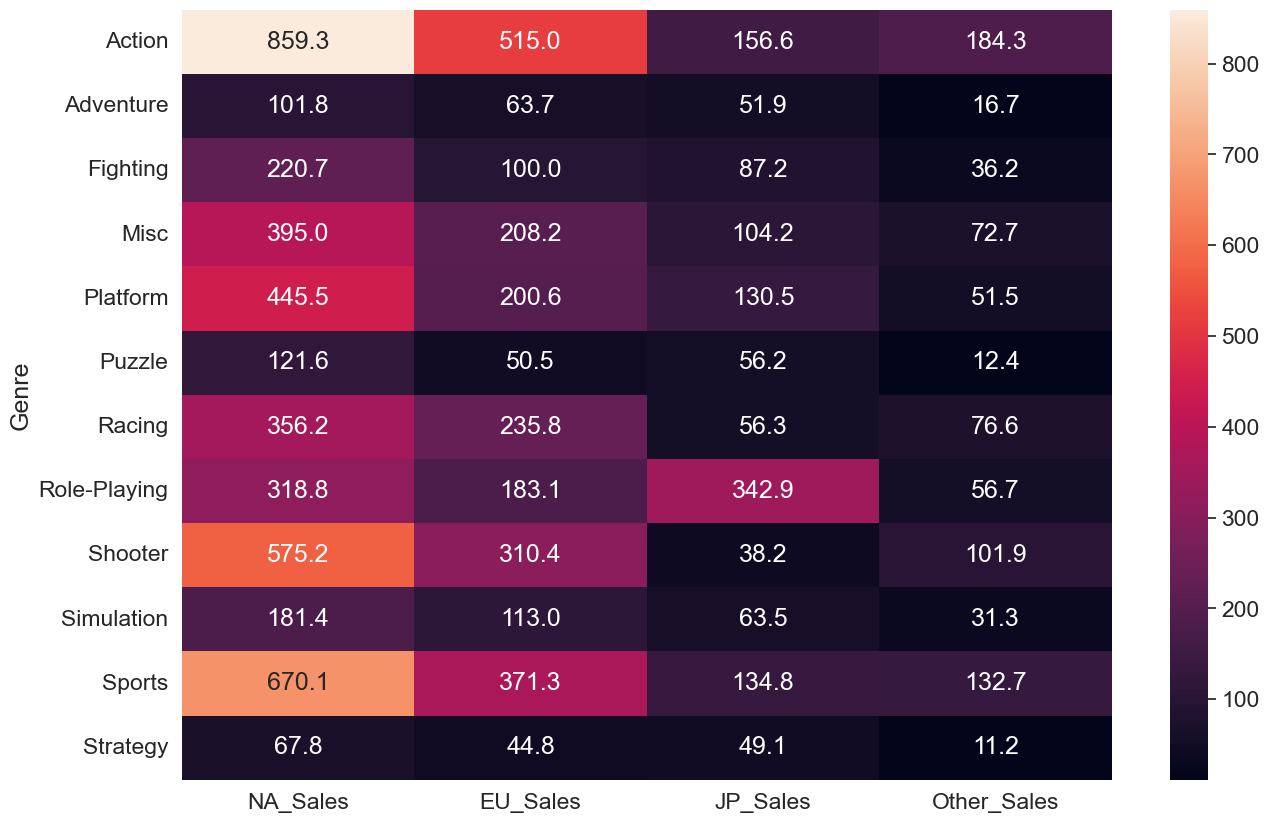

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns

genre_sales_df = df_clean[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
affinity_genre = genre_sales_df.groupby(by = ['Genre']).sum()

# 지역에 따른 장르별 판매량을 히트맵으로 구현
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.heatmap(affinity_genre, annot=True, fmt = '.1f')

plt.show()

# 2. 연도별 게임의 트렌드가 있을까?

> 트렌드는 어떤 것을 기준으로 파악했나요?

총 판매량을 트렌드의 기준으로 삼았다.

> 연도별로 트렌드가 존재하나요?

1. 연도에 따른 총 판매량 

    게임 판매량은 2008년을 기점으로 크게 감소하고 있다.

2. 연도에 따른 총 판매량 1위 장르
    
    판매량에 따른 장르는 2000년 이후 스포츠와 액션 장르가 판매량 1위를 가져가고 있다.
    
    대부분의 장르가 2008년 이래 역성장하며 판매량이 꾸준히 우하향하고 있으나 어드벤쳐 장르는 2010년을 기점으로 전체 판매량의 흐름에서 벗어나 성장하는 모습을 보여주고 있다.

    어드벤쳐 장르는 그런 의미에서 시장을 확장할 가능성이 있는 장르로 보인다.

2. 플랫폼 별 판매량

    장르와 달리 1,2위 플랫폼이 고착화되지 않고 주기적으로 변하고 있다.
    
    최신 기종 중 판매량이 높은 PS4가 최근 플랫폼 트랜드라고 볼 수 있다.

3. 퍼블리셔 별 판매량

    닌텐도와 EA 두 배급사가 꾸준히 1위를 가져가고 있으며 고착화된 상태다.

> 왜 존재한다/존재하지 않는다고 생각했나요?

퍼블리셔의 경우 이미 트렌드를 논할 수 없을 정도로 고착화된 상태다.

플랫폼의 경우 고착화되지 않고 주기적으로 변하고 있는 것은 맞으나 근래에 확장 가능성이 보이거나 역성장 흐름에서 벗어난, 트렌드라 할 수 있는 플랫폼은 존재하지 않는다. 새로운 기종이 나올 때 트렌드가 변하는 구조이기 때문이다.

장르 역시 2000년 이후 스포츠와 액션으로 전체 트렌드는 고착화됐으며 변화 가능성은 없어 보인다.

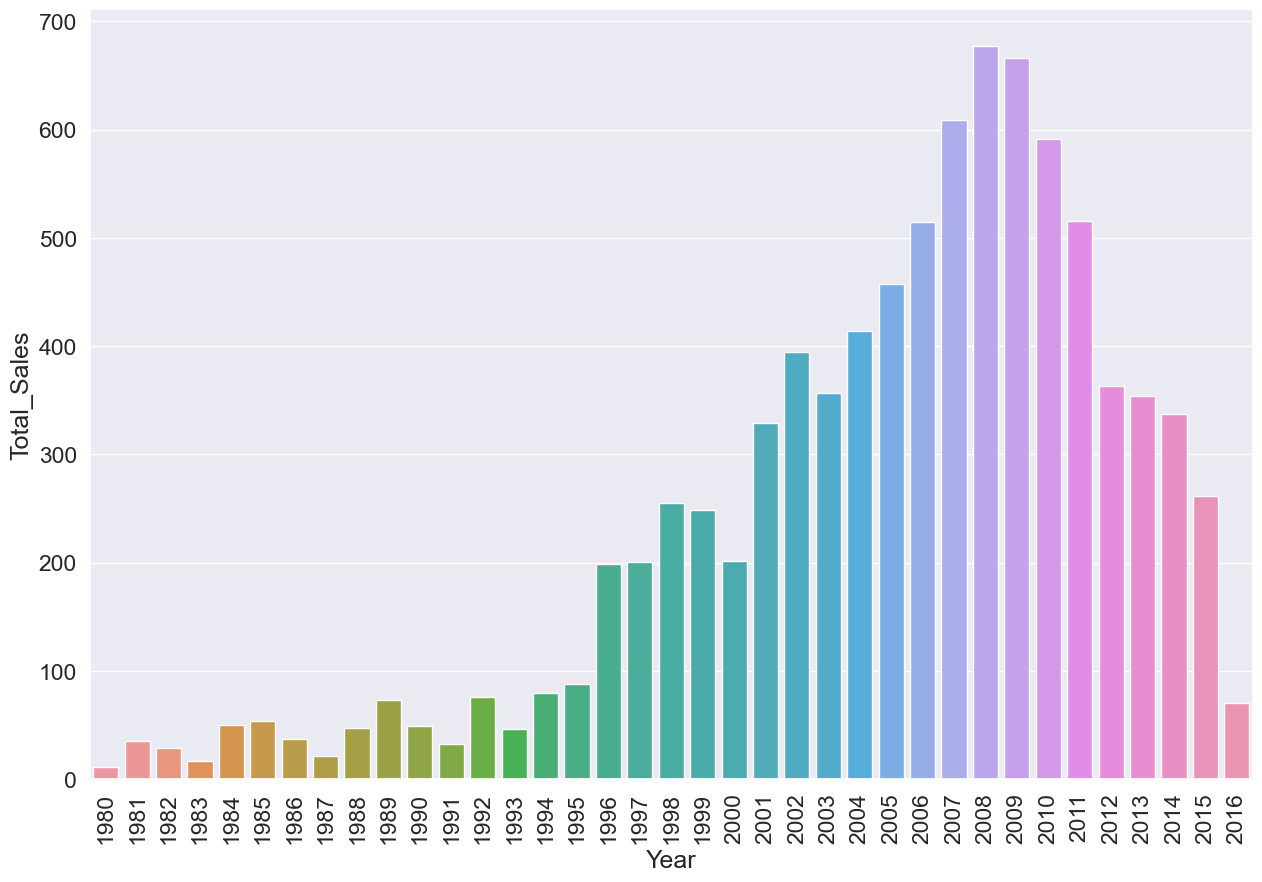

In [312]:
# 연도에 따른 게임 판매량 barplot 그리기
TotalSales_year = df_clean.groupby(by=['Year'])['Total_Sales'].sum()
TotalSales_year = TotalSales_year.reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Total_Sales", data=TotalSales_year)
plt.xticks(rotation=90)
plt.show()
# 유료게임에 전체적 판매량은 큰 폭으로 감소하고 있다.

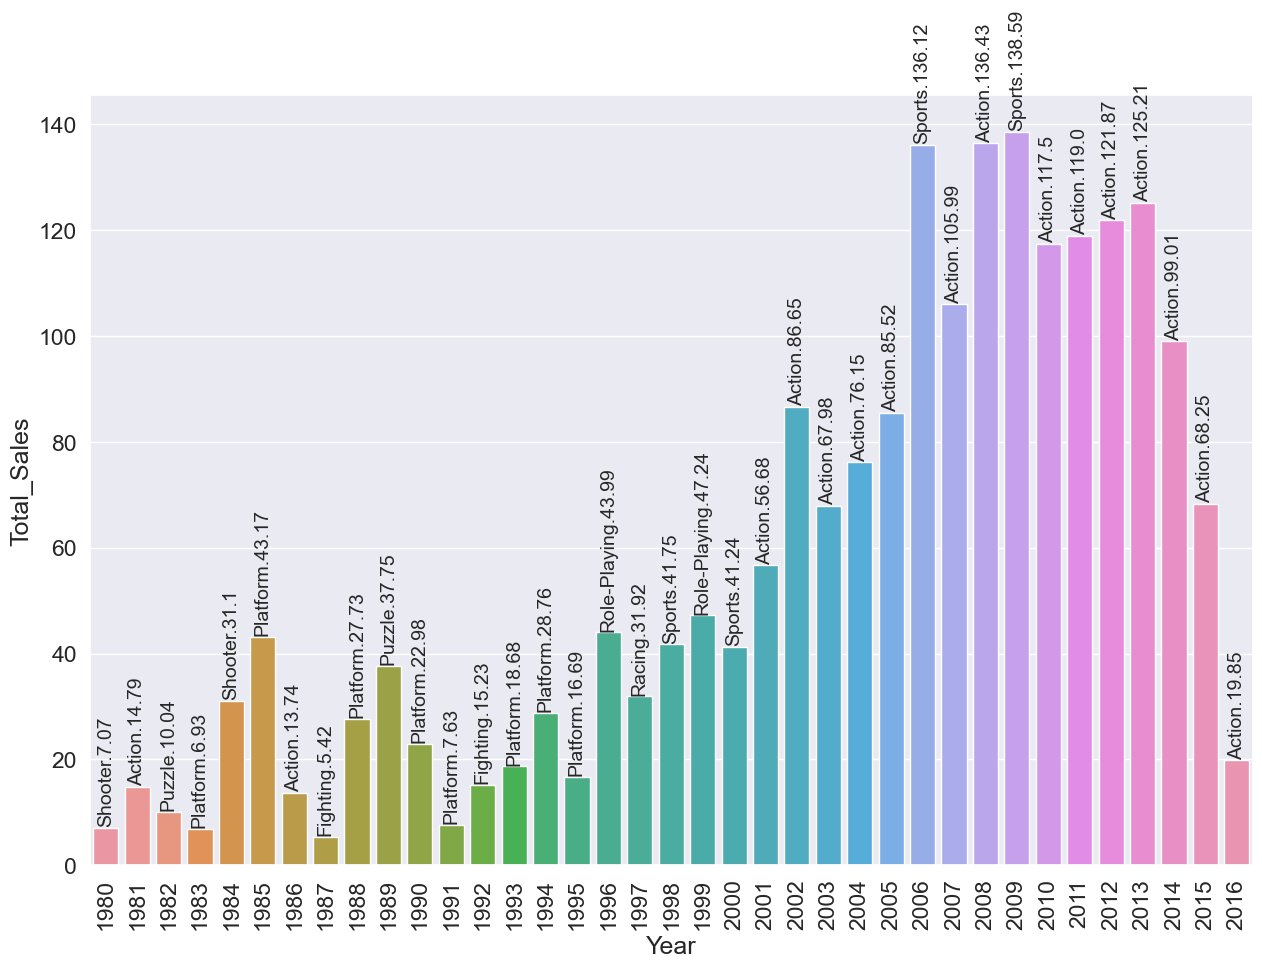

In [313]:
# 연도에 따른 1위 장르 게임의 판매량 barplot 그리기
year_sale_genre = df_clean.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_1stgenre = year_sale_genre.groupby(by=['Year'])['Total_Sales'].transform(max) == year_sale_genre['Total_Sales']
year_genre_max = year_sale_genre[year_1stgenre].reset_index(drop=True)

genre = year_genre_max['Genre']

plt.figure(figsize=(15, 10))
bar = sns.barplot(x='Year', y='Total_Sales', data=year_genre_max)

index = 0
for value in year_genre_max['Total_Sales']:
    bar.text(index, value + 1, str(genre[index] + '.' +str(round(value, 2))), size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()


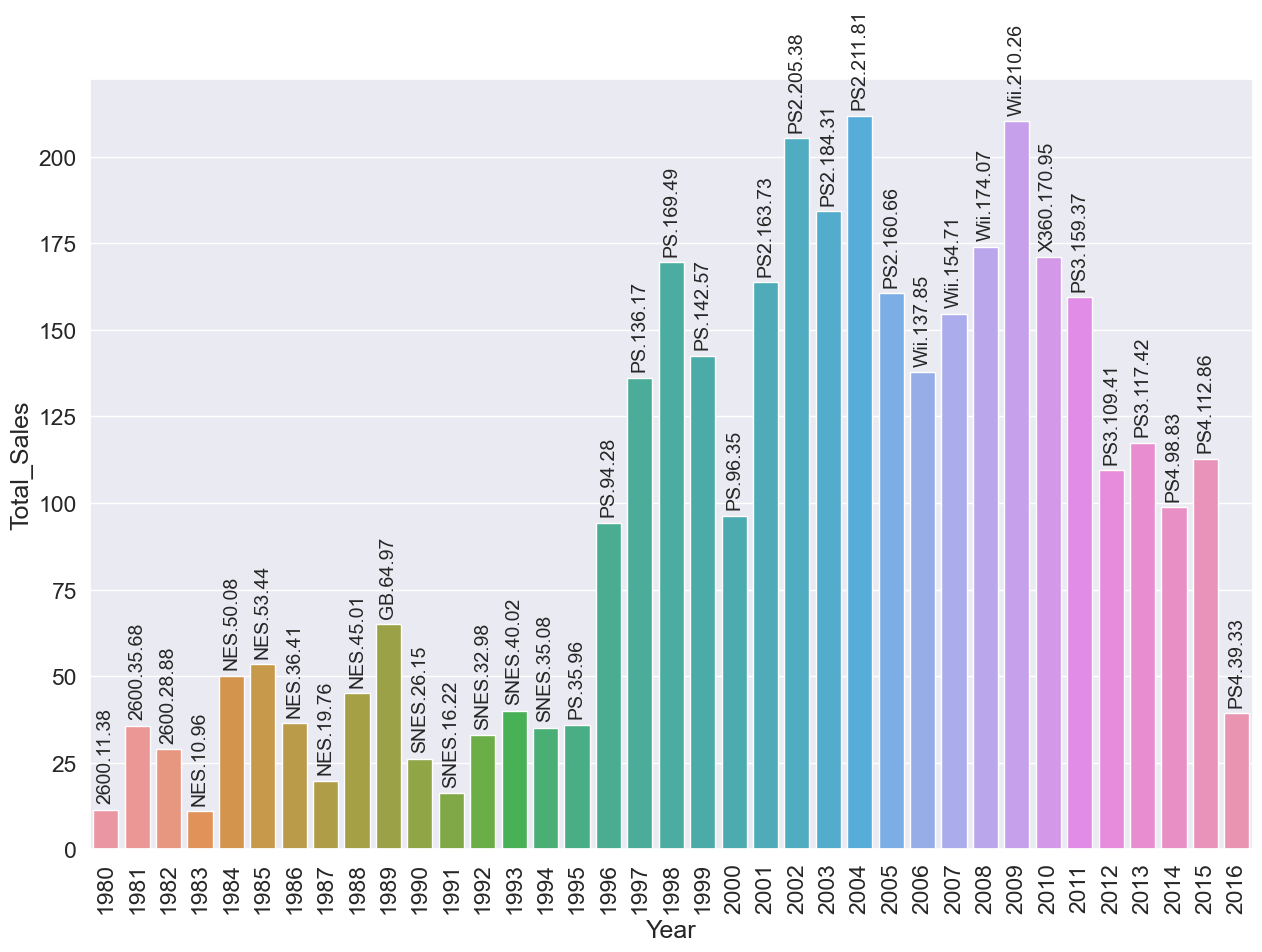

In [314]:
# 연도에 따른 1위 플랫폼 게임의 판매량 barplot 그리기
year_sale_platform = df_clean.groupby(by=['Year', 'Platform'])['Total_Sales'].sum().reset_index()
year_1stplatform = year_sale_platform.groupby(by=['Year'])['Total_Sales'].transform(max) == year_sale_platform['Total_Sales']
year_platform_max = year_sale_platform[year_1stplatform].reset_index(drop=True)

platform = year_platform_max['Platform']

plt.figure(figsize=(15, 10))
bar = sns.barplot(x='Year', y='Total_Sales', data = year_platform_max)

index = 0
for value in year_platform_max['Total_Sales']:
    bar.text(index, value + 3, str(platform[index] + '.' +str(round(value, 2))), size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()
# 장르와 달리 1,2위 플랫폼이 고착화되지 않고 꾸준히 변화하고 있다.
# 최신 기종 중 판매량이 높은 PS4가 최근 플랫폼 트랜드라고 할 수 있다.

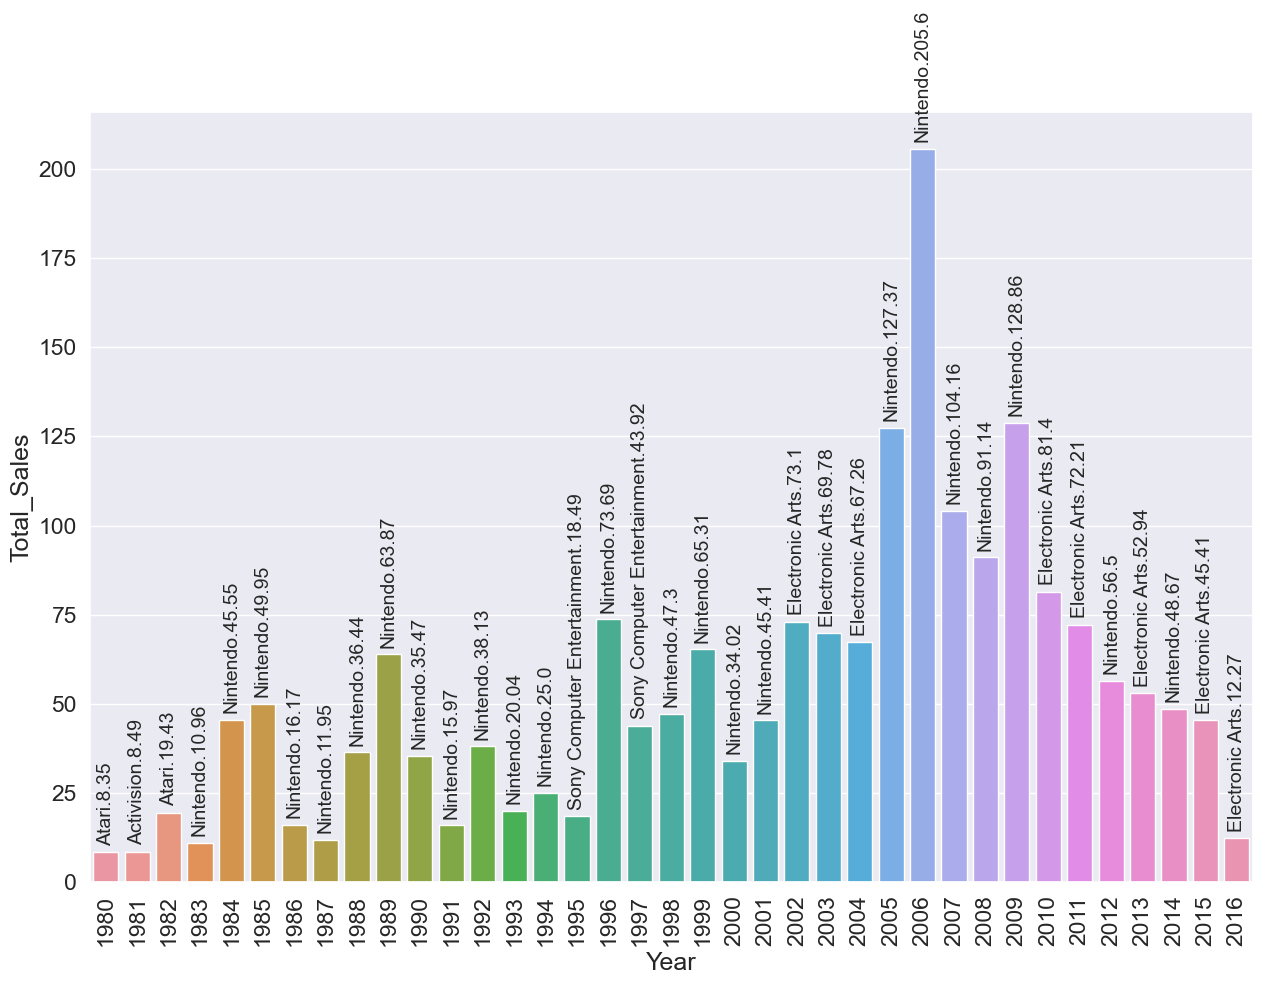

In [315]:
# 연도에 따른 1위 배급사 게임의 판매량
year_sale_Publisher = df_clean.groupby(by=['Year', 'Publisher'])['Total_Sales'].sum().reset_index()
year_1stpublisher = year_sale_Publisher.groupby(by=['Year'])['Total_Sales'].transform(max) == year_sale_Publisher['Total_Sales']
year_publisher_max = year_sale_Publisher[year_1stpublisher].reset_index(drop=True)

publisher = year_publisher_max['Publisher']

plt.figure(figsize=(15, 10))
bar = sns.barplot(x='Year', y='Total_Sales', data = year_publisher_max)

index = 0
for value in year_publisher_max['Total_Sales']:
    bar.text(index, value + 3, str(publisher[index] + '.' +str(round(value, 2))), size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()
# 1998년 이래 닌텐도와 EA 두 배급사가 1위를 가져가고 있다.

인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

# 인기가 많다는 것을 어떻게 정의했나요?

총판매량이 높은 게임 상위 240개를 기준으로 선정했다.

1. 해당 게임이 왜 인기가 많다고 생각했나요?   

    총판매량이 인기도를 알 수 있는 직관적인 척도인 동시에 이번 분석에서 예측하고자 하는 핵심 요소이기 때문이다.

2. 시각화를 통해 무엇을 나타내고자 하는지를 고려했나요?

    우선, 인기작들의 장르와 총판매량을 함께 나타낼 수 있는 scatter plot을 구현했다.
    
    이 그래프를 통해 장르 별 메가 히트할 가능성과 히트 시 얻을 수 있는 판매량을 시각적으로 이해할 수 있다.

    두번째로, 인기작들의 지역별 판매량과 총 판매량 간 상관관계를 히트맵을 통해 나타냈다.

    인기작들의 총 판매량은 북미와 유럽 판매량과 높은 상관관계가 있다.
    
3. 해당 분석을 통해 어떤 인사이트를 도출할 수 있나요?

    - 인기가 많아지는 것에 장르가 기여하는 바가 크다, 액션과 스포츠의 경우 각각 57, 41개의 작품이 인기작으로 분류됐다.

    - 인기작들의 총판매량은 북미지역과 유럽지역의 흥행과 직결된다.

In [316]:
# 동일작끼리 플랫폼 구분없이 판매량을 합쳤다
df_sales_by_name_genre = df.groupby(['Name', 'Genre']).sum().reset_index()
df_sales_by_name_genre

C:\Users\born9\AppData\Local\Temp\ipykernel_53724\455316015.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sales_by_name_genre = df.groupby(['Name', 'Genre']).sum().reset_index()


,Name,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,'98 Koshien,Sports,1998.0,0.15,0.10,0.12,0.03,0.40
1,.hack//G.U. Vol.1//Rebirth,Role-Playing,2006.0,0.00,0.00,0.17,0.00,0.17
2,.hack//G.U. Vol.2//Reminisce,Role-Playing,2006.0,0.11,0.09,0.00,0.03,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),Role-Playing,2006.0,0.00,0.00,0.16,0.00,0.16
4,.hack//G.U. Vol.3//Redemption,Role-Playing,2007.0,0.00,0.00,0.17,0.00,0.17
...,...,...,...,...,...,...,...,...
11462,thinkSMART: Chess for Kids,Misc,2011.0,0.01,0.00,0.00,0.00,0.01
11463,uDraw Studio,Misc,2010.0,1.67,0.58,0.00,0.20,2.45
11464,uDraw Studio: Instant Artist,Misc,4022.0,0.09,0.10,0.00,0.02,0.21
11465,wwe Smackdown vs. Raw 2006,Fighting,0.0,1.57,1.02,0.00,0.41,3.00


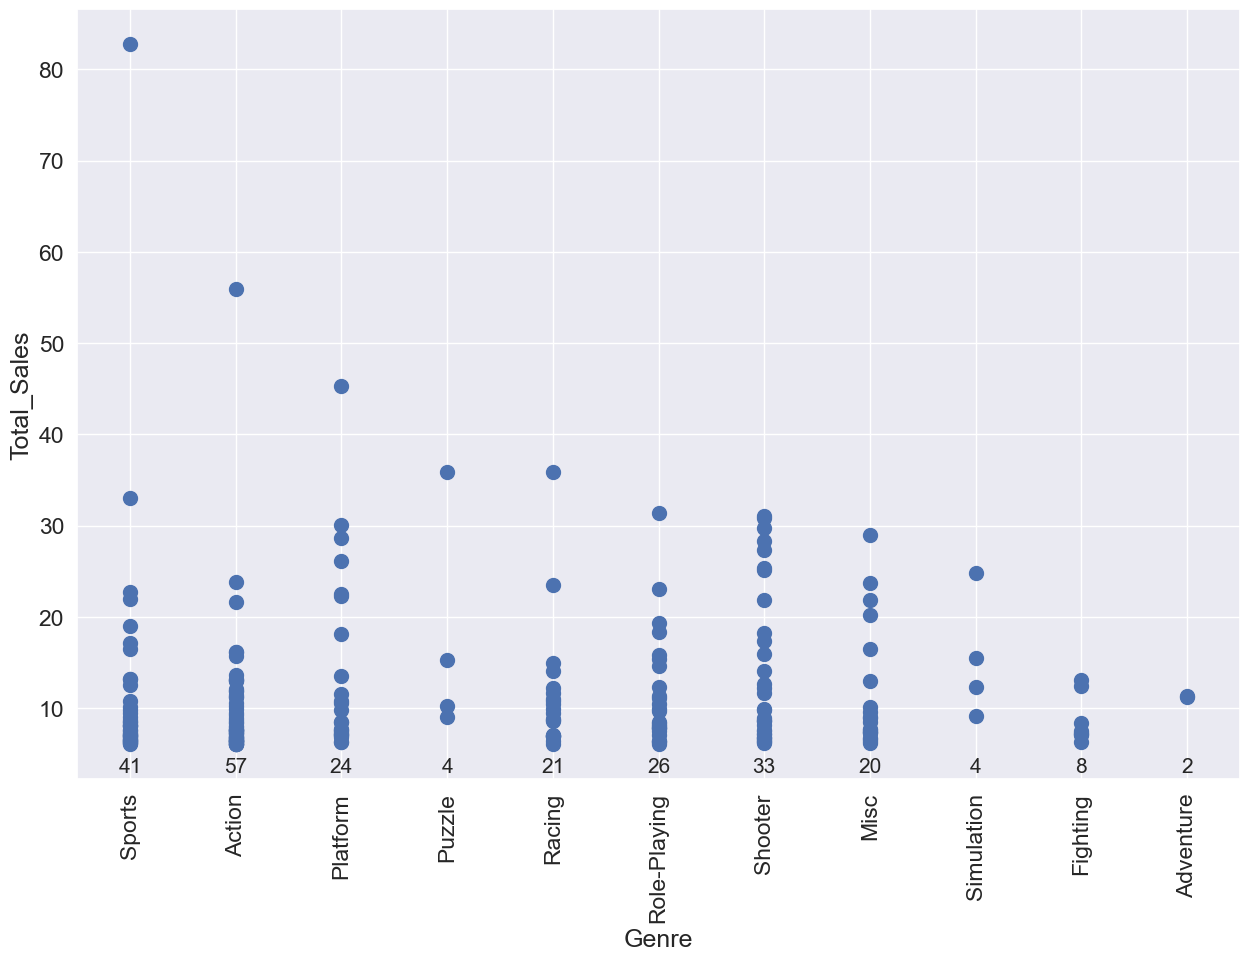

In [317]:
# df_sales_by_name_genre에서 총판매량 순으로 240개 추출
df_top240 = df_sales_by_name_genre.sort_values('Total_Sales', ascending=False).head(240)

# 각 장르별 데이터프레임을 만들고 개수를 구해 저장
genre_counts = []
for genre in df_top240['Genre'].unique():
    genre_df = df_top240[df_top240['Genre'] == genre]
    count = len(genre_df)
    genre_counts.append(count)

result_plot = df_top240[['Genre', 'Total_Sales']]

plt.figure(figsize=(15, 10))
plt.scatter(result_plot['Genre'], result_plot['Total_Sales'], s=100)
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('Total_Sales')

# 각 장르별로 관측치 개수 출력
for i, count in enumerate(genre_counts):
    plt.text(i, 3, count, ha='center', fontsize=15)

plt.show()

C:\Users\born9\AppData\Local\Temp\ipykernel_53724\3688642274.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_top240.corr(), annot=True, linewidth=3)


<Axes: >

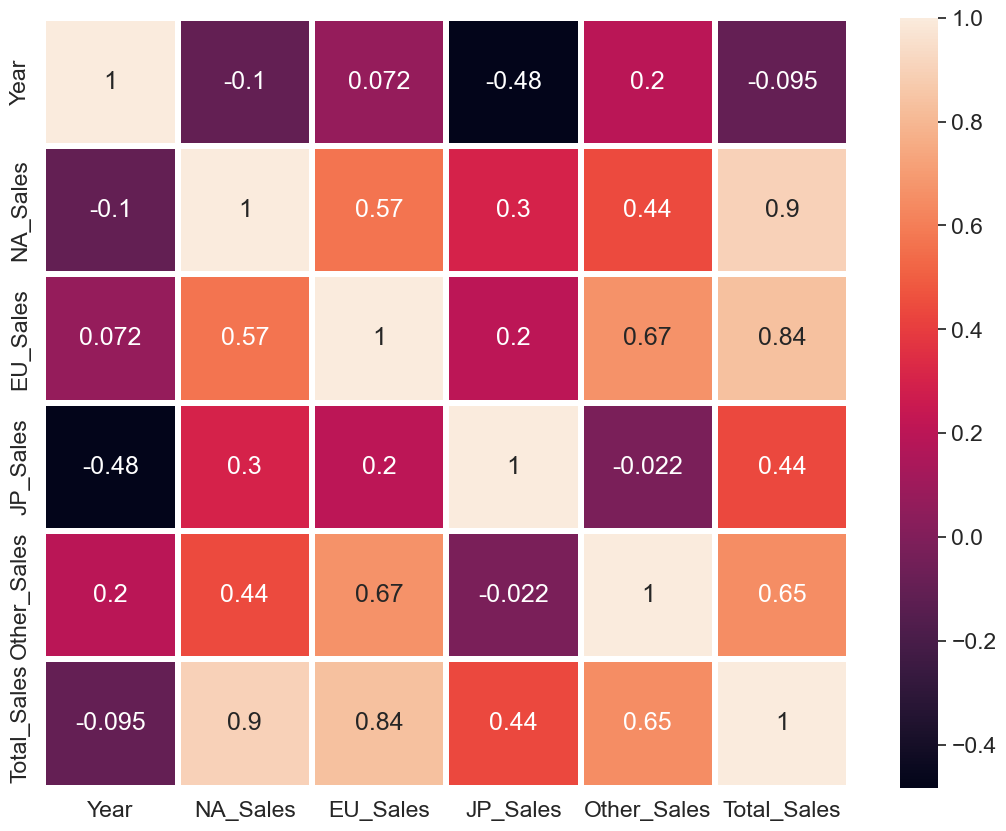

In [318]:
plt.figure(figsize=(13,10))
sns.heatmap(df_top240.corr(), annot=True, linewidth=3)

# 다음 분기에 어떤 게임을 설계해야 할까

우선 2010년부터 2015년까지의 장르별 발매 게임수와 평균 판매량을 그래프로 그렸다.

주요 장르인 액션은 경쟁작이 너무 많아서 제외한다.

스포츠, 슈팅, 롤플레잉의 경우 경쟁 게임이 꾸준하게 많이 나오고 있다.

롤플레잉의 경우 경쟁작 수로는 스포츠와 슈팅 장르와 비슷하지만 NA와 EU에서 성공하기 어려워 큰 성공을 거두기 어려운 장르다.

스포츠과 슈팅 장르를 비교할 때 경쟁작수도 슈팅 장르가 적으며 평균 판매량도 스포츠를 압도한다.

따라서 북미, EU 시장에서 큰 성공을 원할 경우 슈팅 장르의 게임을 발매하는 것이 바람직하다고 사료된다.

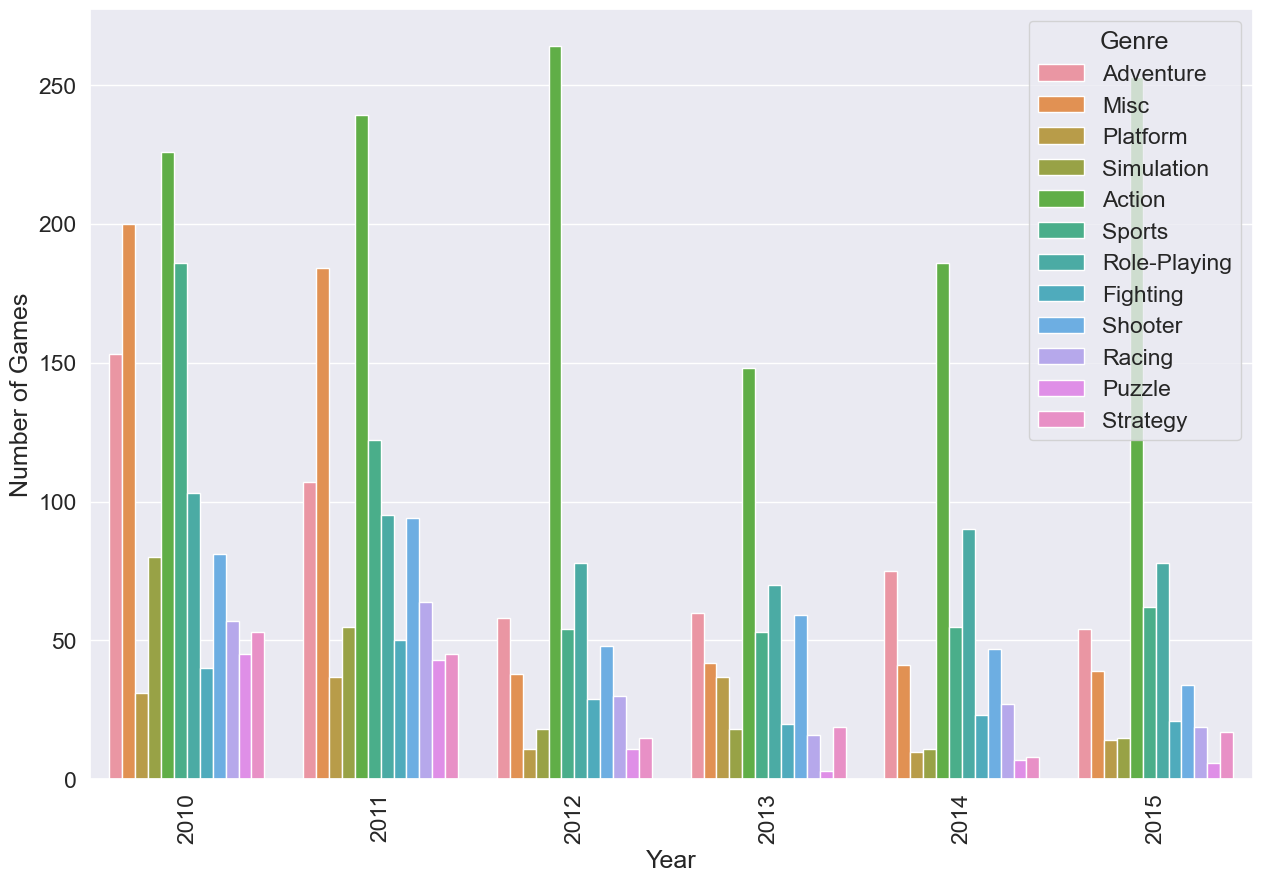

In [348]:
# 기간 제한
df_2010_2015 = df_clean[(df_clean['Year'] >= 2010) & (df_clean['Year'] <= 2015)]

# 각 연도에 따른 장르별 출시게임수 
plt.figure(figsize=(15,10))
sns.countplot(x='Year', data=df_2010_2015, hue='Genre')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

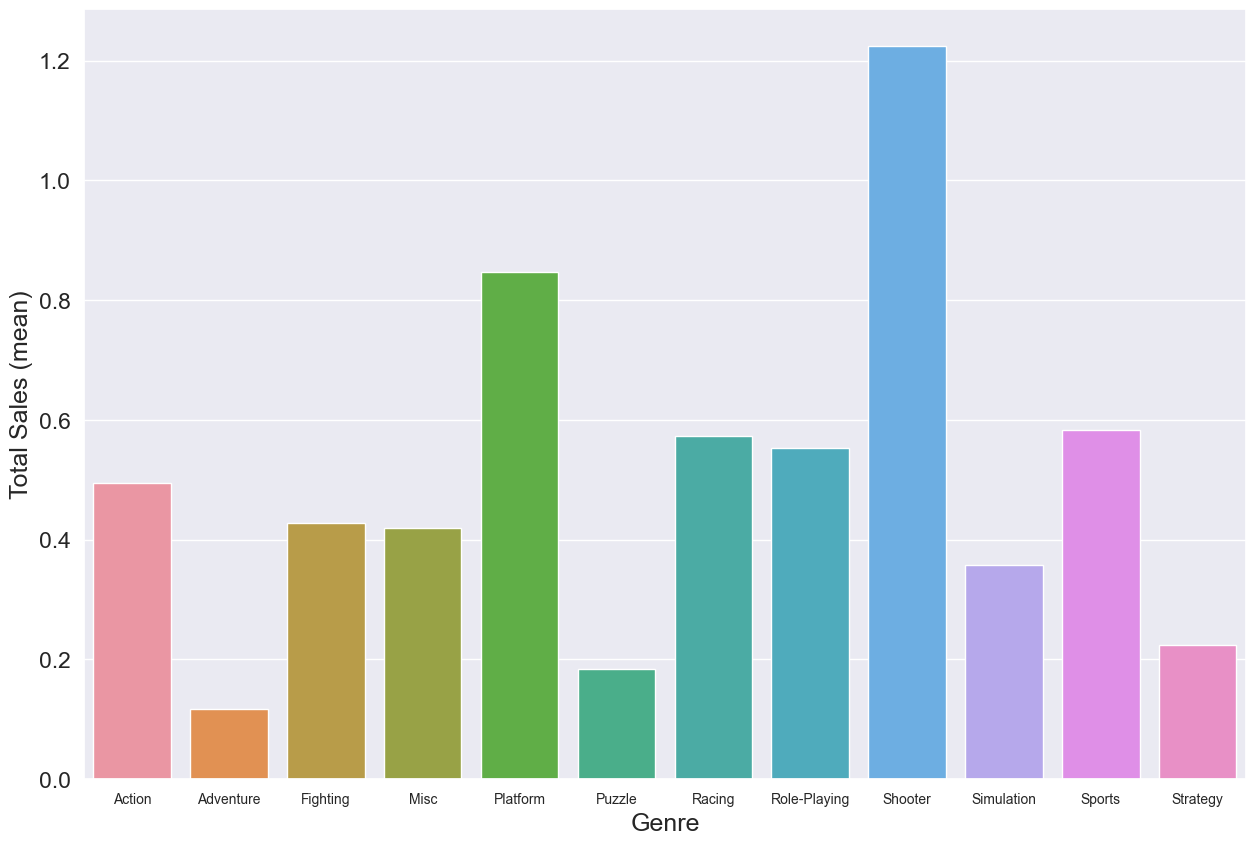

In [365]:
df_2010_2015.groupby(by = 'Genre')['Total_Sales'].mean()

# 2010년에서 2015년 기간 중 장르별 평균 총판매량
df_2010_2015_genre_sales = df_2010_2015.groupby(by='Genre')['Total_Sales'].mean().reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Total_Sales', data=df_2010_2015_genre_sales)
plt.xticks(fontsize=10)
plt.xlabel('Genre')
plt.ylabel('Total Sales (mean)')
plt.show()